
# Digit Recognition using MNIST Dataset
# Vishnu Bangalore Thirumalesha



references:
https://medium.com/analytics-vidhya/principal-component-analysis-pca-with-code-on-mnist-dataset-da7de0d07c22
https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh 
import seaborn as sn


 https://www.kaggle.com/c/digit-recognizer/data
 # Load the data

In [249]:

#Data set downloaded
#https://www.kaggle.com/c/digit-recognizer/data 
maindata = pd.read_csv('train.csv')

maindata.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data's shape (records, dimensions)

In [250]:
maindata.shape

(42000, 785)

# Visulaize the dataset, converting pixels to grayscale images

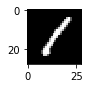

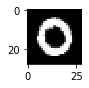

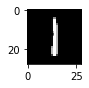

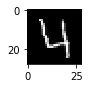

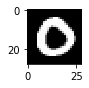

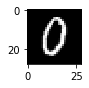

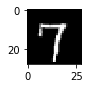

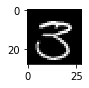

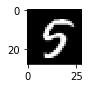

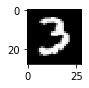

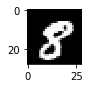

In [251]:
img = maindata.drop("label",axis=1)
for i in range(11):
    plt.figure(figsize=(1,1))
    grid_data = img.iloc[i].values.reshape(28,28)
    plt.imshow(grid_data, interpolation = "none", cmap = "gray")
    plt.show()

# Checking the count of all labels to see if we have balanced dataset

In [252]:
maindata.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

(array([4132., 4684., 4177., 4351., 4072., 3795., 4137., 4401., 4063.,
        4188.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

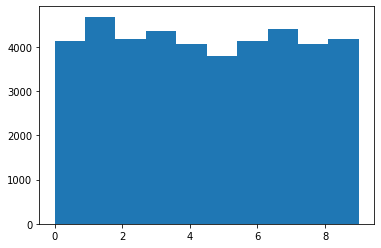

In [305]:
plt.hist(maindata.label)

# mypca function
Scale, fit and transform the data. Get the Top k eigen vectors. Return new modified dataframe for training

In [253]:

def mypca(maindata, k):
    print("in Mypca")
    print("Separating the label")
    lab = maindata['label']
    print("Keeping the data except the label as dataframe")
    dta = maindata.drop("label",axis=1)
    labels = lab.head(42000)
    data = dta.head(42000)
    print(data.shape)
    
    print("Using sklearn's standard scaler to pre-process data ")
    standardized_data = StandardScaler().fit_transform(data)

    sample_data = standardized_data

    covar_matrix = np.matmul(sample_data.T , sample_data)
    val = 784-k

    values, vectors = eigh(covar_matrix, eigvals=(val,783))
    
    vectors = vectors.T

    new_coordinates = np.matmul(vectors, sample_data.T)

    new_coordinates = np.vstack((new_coordinates, labels)).T

    return new_coordinates

In [254]:
###Q2.3 visalization
df = mypca(maindata,2)
df = pd.DataFrame(data=df)


in Mypca
Separating the label
Keeping the data except the label as dataframe
(42000, 784)
Using sklearn's standard scaler to pre-process data 


# New shape of dataframe after mypca function

In [255]:
df.shape

(42000, 3)

In [256]:

two_d = pd.DataFrame(data=df.iloc[:,0:2])
two_d['label'] = df.iloc[:,-1]
# print(two_d)

# Visualization shows overlapping labels and can't be recognized separately

Projecting the original data sample of 784 dimensions on the plane formed by k principal eigenvectors by vector-vector multiplication


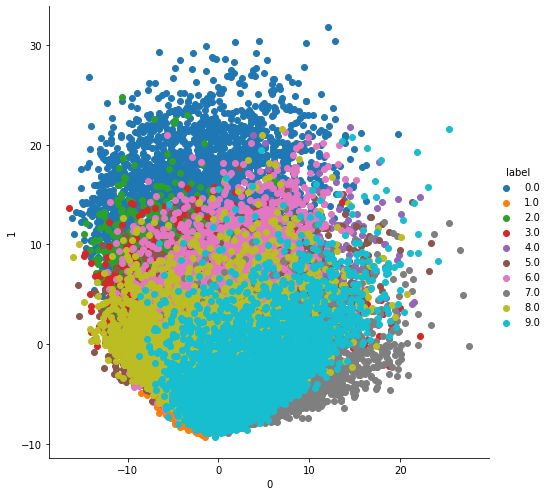

In [257]:
print("Projecting the original data sample of 784 dimensions on the plane formed by k principal eigenvectors by vector-vector multiplication")
sn.FacetGrid(two_d, hue="label", height=7).map(plt.scatter, 0, 1).add_legend()
plt.show()

# Using sklearn to know what is the right number of components for PCA 

In [258]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()# PCA for dimensionality redcution (non-visualization)
pca.n_components = 784
standardized_data = StandardScaler().fit_transform(maindata)
pca_data = pca.fit_transform(standardized_data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

# Shows the variance for data vs components

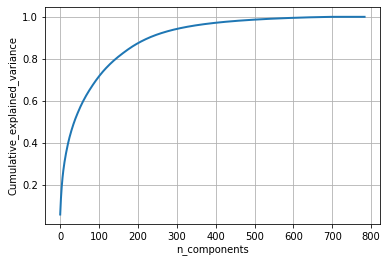

In [259]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

# Since we are using eigen vectors, let's visualize to see how these look
# Creating a function to get eigen vectors 

In [260]:
###Q2.4 Visualize based on 10 PCs
def getvectors(maindata,k):
    print("in getvectors")
    lab = maindata['label']

    dta = maindata.drop("label",axis=1)
    labels = lab.head(40000)
    data = dta.head(40000)

    standardized_data = StandardScaler().fit_transform(data)
    sample_data = standardized_data
    val = 783-k
    covar_matrix = np.matmul(sample_data.T , sample_data)

    values, vc = eigh(covar_matrix, eigvals=(val,783))
    return vc

# Let us get top 11 eigen vectors with 784 features

In [261]:
k = 10
df = mypca(maindata,k)
vc = getvectors(maindata,k)
vc = vc.T

in Mypca
Separating the label
Keeping the data except the label as dataframe
(42000, 784)
Using sklearn's standard scaler to pre-process data 
in getvectors


In [262]:
print(df.shape)
print(vc[0].shape)
##Q2.6 visualizing all learned models
vcdf = pd.DataFrame(data=vc)
vcdf

(42000, 11)
(784,)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007567,0.013350,0.015614,0.015951,0.013505,0.010212,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.017576,-0.014411,-0.010688,-0.007753,-0.003519,-0.001533,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002690,0.007257,0.009166,0.009383,0.006600,0.005320,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.019092,-0.012558,-0.005473,-0.001861,-0.001796,-0.000800,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.039531,-0.031764,-0.022594,-0.016435,-0.010753,-0.007076,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004082,0.000931,-0.001713,-0.002712,-0.002124,-0.001423,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003916,0.003268,0.003702,0.004379,0.005351,0.004652,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000628,0.000281,-0.000761,-0.001299,-0.001877,-0.001600,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008717,0.006019,0.003638,0.001989,0.001286,0.000831,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017234,0.013274,0.009135,0.006271,0.004184,0.003025,0.0,0.0,0.0,0.0


# Display all 11 vectors

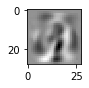

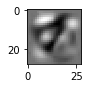

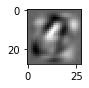

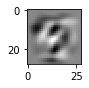

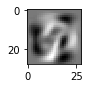

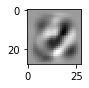

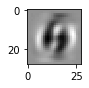

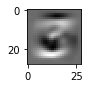

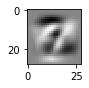

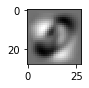

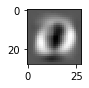

In [263]:

for i in range(11):
    plt.figure(figsize=(1,1))
    grid_data = vcdf.iloc[i].values.reshape(28,28)
    plt.imshow(grid_data, interpolation = "none", cmap = "gray")
    plt.show()

# Using tensor flow for building the model

In [289]:

import tensorflow as tf
import numpy as np


# Since test set didn't have labels, creating Train and Test set with train.csv data

# Here we are not reducing dimension, we shall train and test for all features

In [290]:
xy = maindata['label']
print(xy.shape)
xt = maindata.drop("label",axis=1)
x_train = xt.iloc[:36000,:784]
print(len(x_train))
y_train = xy.iloc[:36000,]
print(len(y_train))

x_test = xt.iloc[36000:42000,:784]
print(len(x_test))
y_test = xy.iloc[36000:42000,]
print(len(y_test))
tf.keras.backend.set_floatx('float64')

(42000,)
36000
36000
6000
6000


# Run epochs and evaluate the model

In [291]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
    
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
xt = x_train.astype(np.float64)
xy = y_train.astype(np.float64)
model.fit(xt, xy, epochs=100)
x = model.evaluate(xt, xy)
print("Train loss , Train Accuracy: ")
print(x)



Epoch 1/100
1125/1125 [==============================] - 9s 8ms/step - loss: 6.2730 - accuracy: 0.8569: 0s - loss: 6.5166 
Epoch 2/100
1125/1125 [==============================] - 10s 9ms/step - loss: 0.7127 - accuracy: 0.8930
Epoch 3/100
1125/1125 [==============================] - 9s 8ms/step - loss: 0.5295 - accuracy: 0.8965
Epoch 4/100
1125/1125 [==============================] - 10s 8ms/step - loss: 0.4699 - accuracy: 0.9048
Epoch 5/100
1125/1125 [==============================] - 9s 8ms/step - loss: 0.4695 - accuracy: 0.9038
Epoch 6/100
1125/1125 [==============================] - 9s 8ms/step - loss: 0.4582 - accuracy: 0.9076
Epoch 7/100
1125/1125 [==============================] - 9s 8ms/step - loss: 0.4410 - accuracy: 0.9098
Epoch 8/100
1125/1125 [==============================] - 10s 9ms/step - loss: 0.4338 - accuracy: 0.9142
Epoch 9/100
1125/1125 [==============================] - 9s 8ms/step - loss: 0.4092 - accuracy: 0.9204
Epoch 10/100
1125/1125 [==========================

# Evaluate for the test set

In [292]:
z = model.evaluate(x_test, y_test)
print("Test loss , Test Accuracy: ")
print(z)

188/188 [==============================] - 1s 6ms/step - loss: 0.7806 - accuracy: 0.9472
Test loss , Test Accuracy: 
[0.7805985986192803, 0.9471666666666667]


# Here we shall train and evaluate the model with just 300 features instead of 784

In [293]:
x_arr = mypca(maindata,299)
x_arr_df = pd.DataFrame(data=x_arr)

x_train = x_arr_df.iloc[:36000,:]
print(x_train.shape)
y_train = x_arr_df.iloc[:36000,-1]
print(y_train.shape)

x_test = x_arr_df.iloc[36000:42000,:]
print(x_test.shape)
y_test = x_arr_df.iloc[36000:42000,-1]
print(y_test.shape)

in Mypca
Separating the label
Keeping the data except the label as dataframe
(42000, 784)
Using sklearn's standard scaler to pre-process data 
(36000, 300)
(36000,)
(6000, 300)
(6000,)


In [294]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax') 
    
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
x_train = x_train.astype(np.float64)
y_train = y_train.astype(np.float64)
model.fit(x_train, y_train, epochs=100)
x = model.evaluate(x_train, y_train)
print("Train loss , Train Accuracy: ")
print(x)


Epoch 1/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.5674 - accuracy: 0.8436
Epoch 2/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3108 - accuracy: 0.9129
Epoch 3/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.2516 - accuracy: 0.9304
Epoch 4/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.2272 - accuracy: 0.9403
Epoch 5/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.2069 - accuracy: 0.9472
Epoch 6/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1833 - accuracy: 0.9531
Epoch 7/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1711 - accuracy: 0.9545
Epoch 8/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1595 - accuracy: 0.9591
Epoch 9/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1451 - accuracy: 0.9625
Epoch 10/100
1125/1125 [==============================] - 2s 1ms/step - l

# Evaluate for the test set

In [295]:

z = model.evaluate(x_test, y_test)
print("Test loss , Test Accuracy: ")
print(z)

188/188 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9852
Test loss , Test Accuracy: 
[0.23197946513215234, 0.9851666666666666]


# Here we shall train and evaluate the model with just 30 features instead of 784

In [296]:
x_arr = mypca(maindata,29)
x_arr_df = pd.DataFrame(data=x_arr)

x_train = x_arr_df.iloc[:36000,:]
print(x_train.shape)
y_train = x_arr_df.iloc[:36000,-1]
print(y_train.shape)

x_test = x_arr_df.iloc[36000:42000,:]
print(x_test.shape)
y_test = x_arr_df.iloc[36000:42000,-1]
print(y_test.shape)

in Mypca
Separating the label
Keeping the data except the label as dataframe
(42000, 784)
Using sklearn's standard scaler to pre-process data 
(36000, 30)
(36000,)
(6000, 30)
(6000,)


In [304]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax') 
    
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
x_train = x_train.astype(np.float64)
y_train = y_train.astype(np.float64)
model.fit(x_train, y_train, epochs=100)
x = model.evaluate(x_train, y_train)
print("Train loss , Train Accuracy: ")
print(x)

Epoch 1/100
1125/1125 [==============================] - 3s 3ms/step - loss: 1.2950 - accuracy: 0.6232
Epoch 2/100
1125/1125 [==============================] - 3s 3ms/step - loss: 0.6648 - accuracy: 0.7839
Epoch 3/100
1125/1125 [==============================] - 2s 1ms/step - loss: 0.5869 - accuracy: 0.8052
Epoch 4/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.5555 - accuracy: 0.8192
Epoch 5/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.5382 - accuracy: 0.8233
Epoch 6/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.5103 - accuracy: 0.8301
Epoch 7/100
1125/1125 [==============================] - 3s 3ms/step - loss: 0.4914 - accuracy: 0.8365
Epoch 8/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4821 - accuracy: 0.8398
Epoch 9/100
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4701 - accuracy: 0.8447
Epoch 10/100
1125/1125 [==============================] - 3s 3ms/step - l

# Evaluate for the test set

In [298]:
z = model.evaluate(x_test, y_test)
print("Test loss , Test Accuracy: ")
print(z)

188/188 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9567
Test loss , Test Accuracy: 
[0.14020097506046295, 0.9566666666666667]
